<a href="https://colab.research.google.com/github/retrodawg19/Emotions_based_music_player/blob/main/stock_price_prediction_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
stock=pd.read_csv("/content/AAPL.csv")

In [3]:
stock.head()

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
1,2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2,2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
3,2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
4,2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


In [4]:
stock.tail()

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
3727,2020-08-07,452.82,454.70,441.17,444.45,49453300,27.954399,455.316298,343.498702,454.79,...,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,450.91
3728,2020-08-10,450.40,455.10,440.00,450.91,53100900,29.847338,462.586675,343.197325,444.45,...,267.073,263.9970,252.9570,3360.47,3351.28,3294.61,27791.44,27433.48,26664.40,437.50
3729,2020-08-11,447.88,449.93,436.43,437.50,46975600,30.576290,466.543079,344.237921,450.91,...,267.911,264.2380,253.5878,3333.69,3360.47,3306.51,27686.91,27791.44,26828.47,452.04
3730,2020-08-12,441.99,453.10,441.19,452.04,41486200,32.050532,472.583564,344.381436,437.50,...,269.120,264.7860,254.3206,3380.35,3333.69,3327.77,27976.84,27686.91,27201.52,460.04
3731,2020-08-13,457.72,464.17,455.71,460.04,52520500,33.532634,479.279768,345.149232,452.04,...,270.255,265.4540,255.0446,3373.43,3380.35,3349.16,27896.72,27976.84,27386.98,459.63


In [5]:
df_stock=stock
df_stock=df_stock.rename(columns={'Close(t)':'Close'})
df_stock.head()

,Date,Open,High,Low,Close,Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2005-10-17,6.66,6.69,6.50,6.60,154208600,0.169237,6.827473,6.150527,6.67,...,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,6.45
1,2005-10-18,6.57,6.66,6.44,6.45,152397000,0.168339,6.819677,6.146323,6.60,...,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,6.78
2,2005-10-19,6.43,6.78,6.32,6.78,252170800,0.180306,6.861112,6.139888,6.45,...,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,6.93
3,2005-10-20,6.72,6.97,6.71,6.93,339440500,0.202674,6.931847,6.121153,6.78,...,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,6.87
4,2005-10-21,7.02,7.03,6.83,6.87,199181500,0.216680,6.974860,6.108140,6.93,...,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,7.01


In [6]:
df_stock.shape

(3732, 64)

In [7]:
df_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'SD20', 'Upper_Band',
       'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)', 'S_Close(t-3)',
       'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20', 'MA50', 'MA200',
       'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD', 'MACD_EMA',
       'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K', 'STD5',
       'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

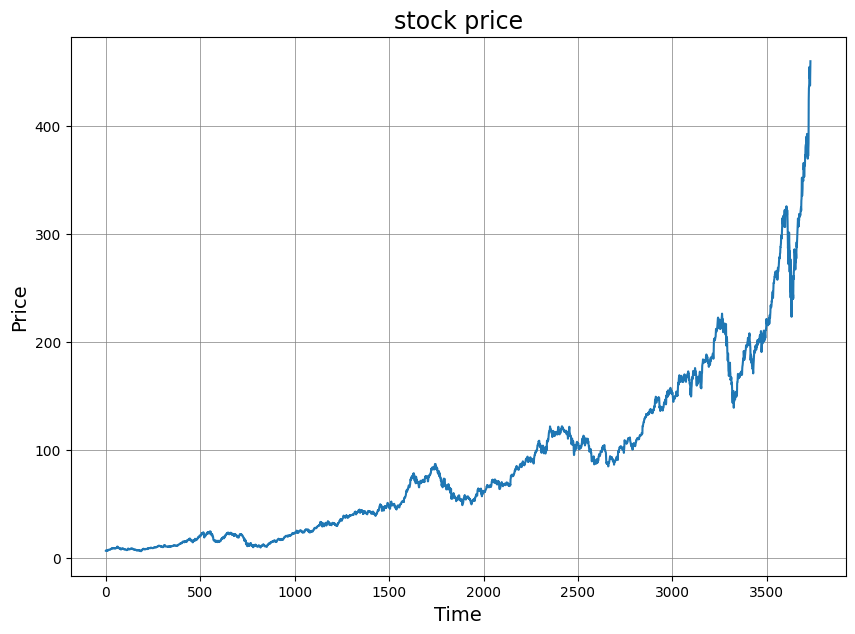

In [8]:
df_stock['Close'].plot(figsize=(10,7))
plt.title("stock price",fontsize=17)
plt.ylabel("Price",fontsize=14)
plt.xlabel("Time",fontsize=14)
plt.grid(which="both",color="grey",linestyle="-",linewidth=0.5)
plt.show()

In [9]:
df_stock=df_stock.drop(columns="Date_col")

In [10]:
def train_test(df_stock):
    # Drop the forecast column to get the features, and set the target as the forecast column
    features = df_stock.drop(columns=['Close_forcast'], axis=1)
    target = df_stock['Close_forcast']

    # Get the length of the data
    data_len = df_stock.shape[0]
    print("Historical stock data length is -", str(data_len))

    # Calculate the training set length (88% of the data)
    train_split = int(data_len * 0.88)
    print("Training set length -", str(train_split))

    # Calculate the validation set length (next 10% of the data)
    val_split = train_split + int(data_len * 0.1)
    print("Validation set length -", str(val_split - train_split))

    # Calculate the test set length (remaining 2% of the data)
    test_len = data_len - val_split
    print("Test set length -", str(test_len))

    # Splitting the data into training, validation, and test sets
    x_train, x_val, x_test = features[:train_split], features[train_split:val_split], features[val_split:]
    y_train, y_val, y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    # Print the shapes of the splits to confirm
    print("Shapes - x_train:", x_train.shape, ", x_val:", x_val.shape, ", x_test:", x_test.shape)
    print("Shapes - y_train:", y_train.shape, ", y_val:", y_val.shape, ", y_test:", y_test.shape)

    return x_train, x_val, x_test, y_train, y_val, y_test
# Example usage:
# Assuming df_stock is your DataFrame
# train_test(df_stock)


In [11]:
 x_train, x_val, x_test, y_train, y_val, y_test=train_test(df_stock)

Historical stock data length is - 3732
Training set length - 3284
Validation set length - 373
Test set length - 75
Shapes - x_train: (3284, 62) , x_val: (373, 62) , x_test: (75, 62)
Shapes - y_train: (3284,) , y_val: (373,) , y_test: (75,)


In [17]:
print(x_train.dtypes)

Date           object
Open          float64
High          float64
Low           float64
Close         float64
               ...   
SnP(t-1))     float64
SnP(t-5)      float64
DJIA_Close    float64
DJIA(t-1))    float64
DJIA(t-5)     float64
Length: 62, dtype: object


In [23]:
from sklearn.linear_model import LinearRegression
# Assuming 'Date' is the column containing dates
x_train = x_train.drop(columns=['Date'])
x_val = x_val.drop(columns=['Date'])
x_test = x_test.drop(columns=['Date'])

# Now try fitting the model again
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
print('lr coefficients:\n',lr.coef_)
print('lr intercept:\n',lr.intercept_)

lr coefficients:
 [ 8.63720886e-03  1.86051919e-01  1.55487063e-01  1.12263757e+00
  1.27287045e-10  6.75244730e-03  1.40229155e-01  1.13219366e-01
  4.25627550e-02  8.96348494e-02  1.01914953e-01  5.94183548e-02
  7.95194235e-02  7.10400007e-02  2.71425003e-01  1.26724261e-01
  8.79333155e-02 -5.87980423e-03 -3.31643393e-01 -3.31643393e-01
 -3.31643393e-01 -3.31643393e-01 -3.31643393e-01  1.88650007e+00
 -1.27270720e+00 -1.65042231e-01 -4.36658091e-04 -3.18527149e-12
 -5.07434399e-03  9.02936461e-03  5.78317106e-04  5.78317103e-04
 -5.57917772e-01 -2.02304173e-10  4.18931972e-11  1.69322438e-02
  1.61636704e-02 -1.75659582e-02  6.12165519e-03  2.15420350e-01
  1.13979655e-01 -2.41954674e-01  7.63050308e-02  3.73276597e-01
  1.22124533e-15 -5.60843989e-02  4.08788805e-02  5.13473863e-01
 -2.94431539e-02 -8.41335080e-02  5.10939135e-02 -8.14435719e-03
 -1.95035196e-02  5.67587251e-02  4.39707788e-02  1.29311738e-02
 -9.99967545e-03 -3.89778364e-03 -1.62174814e-03  1.44436900e-03
  2.834

In [25]:
print("performance (r2):" ,lr.score(x_train,y_train))

performance (r2): 0.9994516474373267


In [26]:
def mape(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [27]:
print(x_val.dtypes)

Open          float64
High          float64
Low           float64
Close         float64
Volume          int64
               ...   
SnP(t-1))     float64
SnP(t-5)      float64
DJIA_Close    float64
DJIA(t-1))    float64
DJIA(t-5)     float64
Length: 61, dtype: object


In [28]:
y_train_pred = lr.predict(x_train)
y_val_pred = lr.predict(x_val)
y_test_pred = lr.predict(x_test)

In [30]:
print('train mape:',mape(y_train,y_train_pred))
print('val mape:',mape(y_val,y_val_pred))
print('test mape:',mape(y_test,y_test_pred))
print('train r2:',lr.score(x_train,y_train))
print('val r2:',lr.score(x_val,y_val))
print('test r2:',lr.score(x_test,y_test))
print('val mse',np.mean((y_val-y_val_pred)**2))
print('test mse',np.mean((y_test-y_test_pred)**2))
print('val mae',np.mean(np.abs(y_val-y_val_pred)))
print('test mae',np.mean(np.abs(y_test-y_test_pred)))

train mape: 1.4529227988695517
val mape: 1.6785550105795428
test mape: 1.767226017316507
train r2: 0.9994516474373267
val r2: 0.9852802448096912
test r2: 0.9622732317222127
val mse 34.943634531703985
test mse 79.2136711115264
val mae 3.7457620520241113
test mae 6.498394073878306


In [31]:
df_pred=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
df_pred.head()

,Actual,Predicted
3657,292.48,286.874736
3658,287.77,290.926674
3659,291.84,287.018511
3660,296.22,290.200746
3661,299.28,295.318944


In [44]:
df_pred = pd.DataFrame(y_val.values, columns=['Actual'], index=y_val.index)
df_pred['Predicted'] = y_val_pred
df_pred = df_pred.reset_index()
# Rename the column from 'index' to 'Date' after reset_index()
df_pred = df_pred.rename(columns={'index': 'Date'})

# Attempt to infer the datetime format, handle potential errors
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'], errors='coerce')

df_pred

,Date,Actual,Predicted
0,1970-01-01 00:00:00.000003284,202.30,216.289778
1,1970-01-01 00:00:00.000003285,196.56,201.470181
2,1970-01-01 00:00:00.000003286,198.68,195.948932
3,1970-01-01 00:00:00.000003287,204.71,199.043601
4,1970-01-01 00:00:00.000003288,204.00,204.193666
...,...,...,...
368,1970-01-01 00:00:00.000003652,273.79,275.751756
369,1970-01-01 00:00:00.000003653,281.70,274.020243
370,1970-01-01 00:00:00.000003654,281.90,280.710045
371,1970-01-01 00:00:00.000003655,277.33,280.543603


<Axes: >

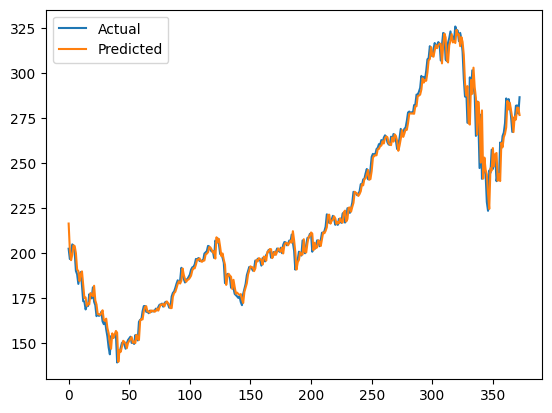

In [45]:
df_pred[['Actual', 'Predicted']].plot()